In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_path = "carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv"
carpetas = pd.read_csv(csv_path,encoding="latin-1")
carpetas.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÃOS HÃRO...,NIÃOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633"
1,2015.0,Diciembre,2015-12-04 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÃN PARA LA ATENCIÃN DE DELITOS SE...,FDS-6,FDS-6-01,GUSTAVO A MADERO,CHALMA DE GUADALUPE,2016,Mayo,2016-05-19 13:09:56,QUERETARO NO.86 MZ 520 LT 13,NaN,-99.153112,19.549869,"19.5498689998,-99.153112"
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÃN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467"
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675"
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319"


In [3]:
# Separar 2018
carpetas2018=carpetas.loc[carpetas["ao_hechos"] ==2018, :]
#carpetas2018=carpetas2018.loc[carpetas2018["mes_hechos"] =="", :]

In [4]:
# Creamos la columna conducta
carpetas2018["conducta"]=carpetas2018["delito"]


In [5]:
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FRAUDE", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LA ADMINISTRACION DE JUSTICIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLENCIA FAMILIAR", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("AMENAZAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ACCESORIOS DE AUTO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NARCOMENUDEO POSESION SIMPLE", "NARCO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESPOJO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR GOLPES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACIÃN DE IDENTIDAD", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE DINERO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE DOCUMENTOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE PEDALES", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE AUTORIDAD", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE EXTORSION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE DOCUMENTOS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SUSTRACCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS AMBIENTALES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENCUBRIMIENTO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR OTRAS CAUSAS", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA BLANCA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("QUEBRANTAMIENTO DE SELLOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR ARMA DE FUEGO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ALLANAMIENTO DE MORADA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NEGACION DEL SERVICIO PUBLICO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABANDONO DE PERSONA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ACOSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NARCOMENUDEO POSESIÃN CON FINES DE VENTA, COMERCIO Y SUMINISTRO", "NARCO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DISCRIMINACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS A ESCUELA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INSOLVENCIA ALIMENTARIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TORTURA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXTORSION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE PLACA DE AUTOMOVIL", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO INDEBIDO DE ATRIBUCIONES Y FACULTADES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSEDAD DE DECLARACIONES", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA)", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE ROBO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORTACION ARMA/PROHIB.", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS ELECTORALES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO DE DOCUMENTO FALSO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("COHECHO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONTRA FUNCIONARIOS PUBLICOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("RESPONSABILIDAD PROFESIONAL", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIOS INTENCIONALES (OTROS)", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR ARMA BLANCA", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORTACION DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRATA DE PERSONAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ANIMALES", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ARMA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CAIDA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃ‘O EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORNOGRAFIA INFANTIL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESOBEDENCIA DE PARTICULARES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DISPAROS DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION EQUIPARADA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR GOLPES", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABORTO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CORRUPCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("POSESION DE VEHICULO ROBADO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS DE ABOGADOS PATRONOS Y LITIGANTES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR QUEMADURAS", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENFERMEDAD", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PARO CARDIACO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE HOMICIDIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE ROBO DE VEHICULO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUE A LAS VIAS DE COMUNICACION (DAÃO A VIAS O MEDIOS DE TRANSPORTE)", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PRECIPITACION", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA DE VEHÃCULO EN MOVIMIENTO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE FLUIDOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FEMINICIDIO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACION DE FUNCIONES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE FRAUDE", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ALHAJAS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("REVELACION DE SECRETOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INTIMIDACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ESTUPRO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXPLOTACIÃN DE MENOR O DISCAPACITADO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PLAGIO O SECUESTRO", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACION DE PROFESION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("COBRANZA ILEGITIMA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN ECOBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN AUTOBÃS FORÃNEO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL CAJERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE VIOLACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR QUEMADURA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR AHOGAMIENTO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH OTRAS MATERIAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR ARMA DE FUEGO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRAFICO DE INFANTES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR DERRUMBE", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION DE CORRESPONDENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESAPARICION FORZADA DE PERSONAS", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR AHORCAMIENTO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PECULADO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (CAIDA)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR INTOXICACION", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUES A LA PAZ PUBLICA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MAQUINARIA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRAFICO DE INFLUENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERSONAS EXTRAVIADAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE SELLOS, MARCAS, LLAVES Y OTROS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH ANONIMAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH RELACIONADAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("OPOSICION A LA OBRA PUBLICA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("REGULACIÃN URBANA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (ASALTO BANCARIO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE SUICIDIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EVASION DE PRESOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH INCOMPETENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE INFANTE", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MAQUINARIA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH SIN DATOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INHUMACIONES Y/O EXHUMACIONES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("MALTRATO ANIMAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VARIACION DE NOMBRE O DOMICILIO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("BIGAMIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN CINE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONTRA EL ESTADO CIVIL", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH OFICIO COLABORACION", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SABOTAJE", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PELIGRO DE CONTAGIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ASFIXIA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENTREGA ILEGITIMA DE UN MENOR", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENRIQUECIMIENTO ILICITO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CALUMNIAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LENOCINIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION DE LA INTIMIDAD", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXPOSICION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DIFAMACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONCUSION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH CERESO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH FRVT", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CAMBIO DE USO DE SUELO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENVENENAMIENTO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH FDS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃ“N)", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (COLISION)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃN)", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUE A LAS VIAS GENERALES DE COMUNICACIÃN", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A VIAS DE COMUNICACION", "ACCIDENTE")

In [6]:
carpetas2018 = pd.read_csv("Carpetas2018.csv")
delito=carpetas2018["conducta"].value_counts()
delito1= pd.DataFrame(delito).reset_index()
delito1.head(30)

,index,conducta
0,ROBO,81666
1,VIOLENCIA,53884
2,ASALTO,43447
3,ENGAÑO,36119
4,ADMON,14842
5,ACCIDENTE,11113
6,NARCO,5974
7,MUERTES,2337
8,HOMICIDIO,1550
9,SECUESTRO,894


In [7]:
# carpetas2018.to_csv("Carpetas2018.csv")
# delito1 = pd.read_csv("Carpetas2018.csv")
delito1=delito1.rename(columns={"index":"Conducta","conducta":"Denuncias"})
delito1.to_csv("Carpetas2018Denun.csv")

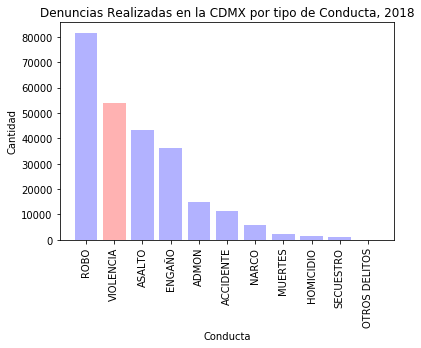

In [8]:
x_axis = np.arange(len(delito1))
# denun=pd.DataFrame(delito1["Denuncias"].map("{:,}".format))


plt.bar(x_axis,delito1["Denuncias"], color=['blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX por tipo de Conducta, 2018")
plt.xlabel("Conducta")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, delito1["Conducta"],rotation=90)   
# plt.grid()

# Save the Figure
plt.savefig("output_data/Denuncias_X_Conducta.png", bbox_inches='tight')

# Show the Figure
plt.show()

In [9]:
#Recuperamos el Archivo original
csv_path = "Carpetas2018.csv"
carpetas2018= pd.read_csv(csv_path,encoding="latin-1")
del carpetas2018['Unnamed: 0']
carpetas2018.head()

,Unnamed: 0.1,Unnamed: 0.1.1,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,...,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta,Dia_sem,dia,hora
0,251849,930982,2018.0,Diciembre,2018-12-31 13:00:00,ABANDONO DE PERSONA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN PARA LA ATENCIÃÂN DE NIÃÂ...,59,UI-2CD,...,2019-12-31 18:07:42,AVENIDA JUAREZ NUMERO 8,JUZGADOS,NaN,NaN,NaN,VIOLENCIA,Lunes,1,13
1,75572,330408,2018.0,Enero,2018-01-22 12:00:00,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN PARA LA ATENCIÃÂN DE DELITO...,T,UI-1SD,...,2018-02-14 11:31,"BOULEVARD MANUEL AVILA CAMACHO,",NaN,-99.203470,19.428314,"19.4283142149,-99.2034701038",ENGAÃO,Lunes,1,12
2,211036,745364,2018.0,Septiembre,2018-09-03 18:45:00,ALLANAMIENTO DE MORADA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN BENITO JUÃÂREZ,BJ-1,UI-1SD,...,2018-09-04 17:25,TLACOQUEMECATL,NaN,-99.174721,19.378548,"19.3785479745,-99.1747206501",VIOLENCIA,Lunes,1,18
3,211032,745360,2018.0,Septiembre,2018-09-03 19:00:00,DAÃÂO EN PROPIEDAD AJENA INTENCIONAL A AUTOM...,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN ÃÂLVARO OBREGÃÂN,AO-3,UI-2CD,...,2018-09-04 17:13,CONDOR,NaN,-99.197648,19.361528,"19.3615277867,-99.19764767",VIOLENCIA,Lunes,1,19
4,75597,330435,2018.0,Febrero,2018-02-12 16:30:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂN EN XOCHIMILCO,XO-2,UI-1SD,...,2018-02-14 12:31,5 DE MAYO,HIDALGO,-99.054958,19.250885,"19.2508854323,-99.0549584418",ROBO,Lunes,1,16


In [10]:
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("DOLORES HIDALGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NAUCALPAN DE JUAREZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ECATEPEC DE MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NEZAHUALCOYOTL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("QUERETARO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ATIZAPAN DE ZARAGOZA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHALCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUIXQUILUCAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TOLUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COLON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTITLAN IZCALLI", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CELAYA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LEON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLALNEPANTLA DE BAZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TECAMAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LA PAZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUERNAVACA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PUEBLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COACALCO DE BERRIOZABAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZACATECAS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORDOBA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MONTERREY", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VERACRUZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLAXCALA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VALLE DE CHALCO SOLIDARIDAD", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORREGIDORA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHILPANCINGO DE LOS BRAVO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHIMALHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("YURIDIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHICONCUAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("XALAPA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IRAPUATO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TULTITLAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAMPECHA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("YURIRIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PACHUCA DE SOTO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN MATIAS TLALANCALECA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUADALUPE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ALTO LUCERO DE GUTIERREZ BARRIOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TULANCINGO DE BRAVO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORTAZAR", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HERMOSILLO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MINERAL DEL MONTE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SANTA MARIA COYOTEPEC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAMPECHE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TENANGO DEL VALLE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LAZARO CARDENAS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOTITLAN DE FLORES MAGON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("EZEQUIEL MONTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AHOME", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PROGRESO DE OBREGON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHICOLOAPAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IGUALA DE LA INDEPENDENCIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SALAMANCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COLIMA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IXTAPALUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("BUCTZOTZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GARCIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("BUENAVENTURA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAÃÂADA MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEPIC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("APASEO EL GRANDE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CADEREYTA DE MONTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AGUASCALIENTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VALLE HERMOSO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZUMPANGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN GREGORIO ATZOMPA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("REYNOSA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IZUCAR DE MATAMOROS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("OAXACA DE JUAREZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTLANCINGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CARDONAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("JALAPAN DE SERRA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZAMORA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CULIACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COATZACOALCOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TIZAYUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PAPALOTLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("POZA RICA DE HIDALGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NAVOJOA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEXCOCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TAMPICO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ALLENDE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOCALTICHE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTITLAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEQUISQUIAPAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN BARTOLO COYOTEPEC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PUERTO VALLARTA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PATZCUARO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHIHUAHUA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AMECAMECA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUITZILAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN FRANCISCO DEL RINCON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NICOLAS ROMERO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLAXCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOTIHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUEHUETOCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MERIDA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VILLAHERMOSA O CENTRO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUANAJUATO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IXTAPAN DE LA SAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUADALAJARA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TIJUANA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LAFRAGUA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AMEALCO DE BONFIL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEZOYUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("JALPAN DE SERRA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("OTHON P. BLANCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("EL BOSQUE", "FUERA DE LA CDMX")



In [11]:
alcaldias=carpetas2018["alcaldia_hechos"].value_counts()
alcaldias1= pd.DataFrame(alcaldias).reset_index()
alcaldias1=alcaldias1.rename(columns={"index":"Alcaldía","alcaldia_hechos":"Denuncias"})
alcaldias1.head()

,Alcaldía,Denuncias
0,CUAUHTEMOC,40138
1,IZTAPALAPA,37326
2,GUSTAVO A MADERO,25206
3,BENITO JUAREZ,22317
4,COYOACAN,16871


In [12]:
carpetas2018.to_csv("Carpetas2018.csv")


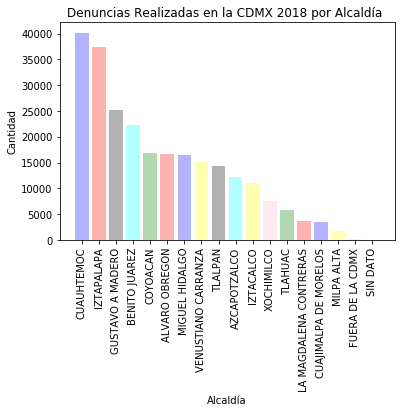

In [13]:
x_axis = np.arange(len(alcaldias1))


plt.bar(x_axis,alcaldias1["Denuncias"] , color=['blue', 'red', 'black', 'cyan', 'green', 'red', 'blue', 'yellow', 'black', 'cyan', 'yellow', 'pink','green', 'red','blue','yellow','pink'], alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX 2018 por Alcaldía ")
plt.xlabel("Alcaldía")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, alcaldias1["Alcaldía"],rotation=90)   
plt.show()

In [14]:

base=carpetas2018.groupby(["alcaldia_hechos","conducta"]).count()["delito"].rename("Denuncias")


# Convert to DataFrame
DenunciasxAlcaldia = pd.DataFrame(base).reset_index()
# DenunciasxAlcaldía = DenunciasxAlcaldía.rename(columns={"conducta": "CONDUCTA", "alcaldia_hechos":"ALCALDIA"})

# Preview DataFrame
DenunciasxAlcaldia.head(20)



,alcaldia_hechos,conducta,Denuncias
0,ALVARO OBREGON,ACCIDENTE,748
1,ALVARO OBREGON,ADMON,798
2,ALVARO OBREGON,ASALTO,3305
3,ALVARO OBREGON,ENGAÃO,2437
4,ALVARO OBREGON,HOMICIDIO,96
5,ALVARO OBREGON,MUERTES,127
6,ALVARO OBREGON,NARCO,294
7,ALVARO OBREGON,OTROS DELITOS,6
8,ALVARO OBREGON,ROBO,4751
9,ALVARO OBREGON,SECUESTRO,70


In [15]:
# Minor Data Munging to Re-Format the Data Frames

Conductaxalcaldía = DenunciasxAlcaldia.pivot(index = "conducta", columns ="alcaldia_hechos", values ="Denuncias" ) 
 
# Preview that Reformatting worked

#Conductaxalcaldía = Conductaxalcaldía.map("{:,}".format)
Conductaxalcaldía["BENITO JUAREZ"].fillna(0,inplace=True)
Conductaxalcaldía["COYOACAN"].fillna(0,inplace=True)
Conductaxalcaldía["CUAJIMALPA DE MORELOS"].fillna(0,inplace=True)
Conductaxalcaldía["FUERA DE LA CDMX"].fillna(0,inplace=True)
Conductaxalcaldía["IZTACALCO"].fillna(0,inplace=True)
Conductaxalcaldía["LA MAGDALENA CONTRERAS"].fillna(0,inplace=True)
Conductaxalcaldía["MIGUEL HIDALGO"].fillna(0,inplace=True)
Conductaxalcaldía["MILPA ALTA"].fillna(0,inplace=True)
Conductaxalcaldía["SIN DATO"].fillna(0,inplace=True)
Conductaxalcaldía["TLAHUAC"].fillna(0,inplace=True)
Conductaxalcaldía["XOCHIMILCO"].fillna(0,inplace=True)
Conductaxalcaldía["XOCHIMILCO"].fillna
#Conductaxalcaldía = Conductaxalcaldía["ALVARO OBREGON"].map("{:,}".format)

Conductaxalcaldía

alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,FUERA DE LA CDMX,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,SIN DATO,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
conducta,,,,,,,,,,,,,,,,,,
ACCIDENTE,748.0,507.0,894.0,937.0,261.0,1427.0,9.0,1130.0,479.0,1367.0,202.0,722.0,155.0,0.0,304.0,742.0,766.0,368.0
ADMON,798.0,429.0,918.0,942.0,237.0,3273.0,20.0,1264.0,568.0,2397.0,238.0,763.0,103.0,5.0,272.0,871.0,1206.0,367.0
ASALTO,3305.0,2525.0,2766.0,2045.0,247.0,5825.0,15.0,4462.0,2569.0,9145.0,288.0,3576.0,124.0,0.0,1021.0,1578.0,2132.0,1362.0
ENGAÃO,2437.0,1519.0,4898.0,2770.0,658.0,7046.0,83.0,3020.0,1159.0,3649.0,415.0,2702.0,167.0,5.0,574.0,2380.0,1615.0,778.0
HOMICIDIO,96.0,58.0,21.0,47.0,16.0,139.0,7.0,259.0,54.0,319.0,24.0,56.0,17.0,2.0,58.0,107.0,115.0,69.0
MUERTES,127.0,70.0,144.0,113.0,43.0,364.0,3.0,256.0,71.0,361.0,34.0,133.0,32.0,0.0,73.0,147.0,248.0,94.0
NARCO,294.0,180.0,116.0,341.0,63.0,1062.0,0.0,858.0,146.0,1161.0,64.0,447.0,43.0,0.0,210.0,119.0,704.0,166.0
OTROS DELITOS,6.0,3.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
ROBO,4751.0,4234.0,9795.0,6108.0,994.0,14416.0,15.0,7946.0,3190.0,10236.0,835.0,5899.0,349.0,0.0,1321.0,4411.0,4876.0,1964.0


In [16]:
Conductaxalcaldía_reset = pd.DataFrame(Conductaxalcaldía).reset_index()
Conductaxalcaldía_reset

alcaldia_hechos,conducta,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,FUERA DE LA CDMX,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,SIN DATO,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
0,ACCIDENTE,748.0,507.0,894.0,937.0,261.0,1427.0,9.0,1130.0,479.0,1367.0,202.0,722.0,155.0,0.0,304.0,742.0,766.0,368.0
1,ADMON,798.0,429.0,918.0,942.0,237.0,3273.0,20.0,1264.0,568.0,2397.0,238.0,763.0,103.0,5.0,272.0,871.0,1206.0,367.0
2,ASALTO,3305.0,2525.0,2766.0,2045.0,247.0,5825.0,15.0,4462.0,2569.0,9145.0,288.0,3576.0,124.0,0.0,1021.0,1578.0,2132.0,1362.0
3,ENGAÃO,2437.0,1519.0,4898.0,2770.0,658.0,7046.0,83.0,3020.0,1159.0,3649.0,415.0,2702.0,167.0,5.0,574.0,2380.0,1615.0,778.0
4,HOMICIDIO,96.0,58.0,21.0,47.0,16.0,139.0,7.0,259.0,54.0,319.0,24.0,56.0,17.0,2.0,58.0,107.0,115.0,69.0
5,MUERTES,127.0,70.0,144.0,113.0,43.0,364.0,3.0,256.0,71.0,361.0,34.0,133.0,32.0,0.0,73.0,147.0,248.0,94.0
6,NARCO,294.0,180.0,116.0,341.0,63.0,1062.0,0.0,858.0,146.0,1161.0,64.0,447.0,43.0,0.0,210.0,119.0,704.0,166.0
7,OTROS DELITOS,6.0,3.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
8,ROBO,4751.0,4234.0,9795.0,6108.0,994.0,14416.0,15.0,7946.0,3190.0,10236.0,835.0,5899.0,349.0,0.0,1321.0,4411.0,4876.0,1964.0
9,SECUESTRO,70.0,79.0,48.0,62.0,21.0,131.0,3.0,90.0,35.0,88.0,11.0,44.0,5.0,0.0,28.0,78.0,53.0,24.0


In [17]:
labels = list(Conductaxalcaldía_reset.columns)
labels.pop(0)

violencia= Conductaxalcaldía_reset.iloc[10,:]
violencia.index
list_violencia = list(violencia.index)

list_violencia.pop(0)
list_violencia
valores_viol = list (violencia.values)
valores_viol.pop(0)
valores_viol

[3958.0,
 2521.0,
 2717.0,
 3506.0,
 920.0,
 6449.0,
 91.0,
 5919.0,
 2685.0,
 8602.0,
 1490.0,
 2169.0,
 761.0,
 3.0,
 1938.0,
 3900.0,
 3300.0,
 2315.0]

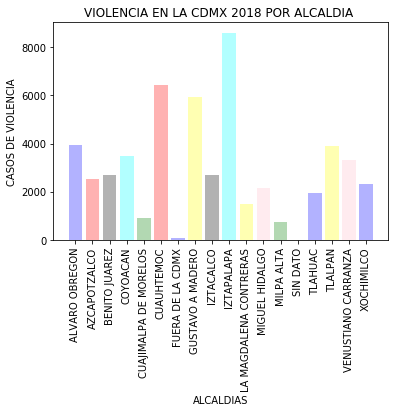

In [18]:
x_axis = np.arange(len(list_violencia))

plt.bar(x_axis,valores_viol , color=['blue', 'red', 'black', 'cyan', 'green', 'red', 'blue', 'yellow', 'black', 'cyan', 'yellow', 'pink','green', 'red','blue','yellow','pink'], alpha=.3, align="center")
plt.title("VIOLENCIA EN LA CDMX 2018 POR ALCALDIA ")
plt.xlabel("ALCALDIAS")
plt.ylabel("CASOS DE VIOLENCIA")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels,rotation=90)   
plt.show()

In [19]:
labels = list(Conductaxalcaldía_reset.columns)
labels.pop(0)
# labels
accidente= Conductaxalcaldía_reset.iloc[0,:]
accidente.index
list_accidente = list(accidente.index)
list_accidente.pop(0)

# list_accidente
valores_acc = list (accidente.values)
valores_acc.pop(0)
valores_acc

[748.0,
 507.0,
 894.0,
 937.0,
 261.0,
 1427.0,
 9.0,
 1130.0,
 479.0,
 1367.0,
 202.0,
 722.0,
 155.0,
 0.0,
 304.0,
 742.0,
 766.0,
 368.0]

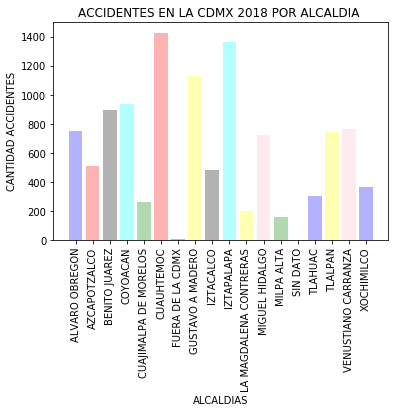

In [20]:

x_axis = np.arange(len(list_accidente))

plt.bar(x_axis,valores_acc , color=['blue', 'red', 'black', 'cyan', 'green', 'red', 'blue', 'yellow', 'black', 'cyan', 'yellow', 'pink','green', 'red','blue','yellow','pink'], alpha=.3, align="center")
plt.title("ACCIDENTES EN LA CDMX 2018 POR ALCALDIA ")
plt.xlabel("ALCALDIAS")
plt.ylabel("CANTIDAD ACCIDENTES")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels,rotation=90)   
plt.show()

In [21]:
mes=carpetas2018["mes_hechos"].value_counts()
mes1= pd.DataFrame(mes).reset_index()
mes1=mes1.rename(columns={"index":"Mes","mes_hechos":"Denuncias"})
mes1.head(20)

,Mes,Denuncias
0,Octubre,22838
1,Mayo,22215
2,Agosto,21743
3,Noviembre,21305
4,Marzo,21132
5,Julio,21034
6,Septiembre,20899
7,Junio,20796
8,Abril,20694
9,Diciembre,20197


In [22]:
#hacer la fecha tipo fecha

carpetas2018['fecha_hechos'] = carpetas2018['fecha_hechos'].astype('datetime64[ns]')

In [23]:
#for row in capertas2018.iterrow()
#carpetas2018[].dayofweek
serie1=carpetas2018['fecha_hechos']
serie1.dt.day_name()
carpetas2018["Dia_sem"]=pd.DataFrame(serie1.dt.day_name())


In [24]:
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Monday", "Lunes")
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Tuesday", "Martes")
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Wednesday", "Miercoles")
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Thursday", "Jueves")
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Friday", "Viernes")
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Saturday", "Sábado")
carpetas2018["Dia_sem"]= carpetas2018["Dia_sem"].replace("Sunday", "Domingo")
dias=carpetas2018["Dia_sem"].value_counts()

dias

Viernes      39360
Lunes        37976
Miercoles    37796
Jueves       37279
Martes       36896
Sábado       33315
Domingo      29228
Name: Dia_sem, dtype: int64

In [25]:
serie1=carpetas2018['fecha_hechos']
serie1.dt.hour
carpetas2018["hora"]=pd.DataFrame(serie1.dt.hour)


In [26]:
horas=carpetas2018["hora"].value_counts()

horas1=pd.DataFrame(horas)
horas1.sort_index(ascending=True)

,hora
0,5593
1,4129
2,3654
3,3509
4,3087
5,4196
6,6292
7,8761
8,9900
9,11730


In [27]:
carpetas2018.to_csv("Carpetas2018.csv")

In [28]:
csv_path = "coloniascdmx.csv"
coloniasxalcaldiaxgeo = pd.read_csv(csv_path,encoding="latin-1")
coloniasxalcaldiaxgeo.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,LOMAS DE REFORMA,9.0,"19.4016815485,-99.2354719599","{""type"": ""Polygon"", ""coordinates"": [[[-99.2359...",16,MIGUEL HIDALGO,16-043,"4971, 4983",NaN
1,DANIEL GARZA (AMPL),9.0,"19.4092184712,-99.1938392453","{""type"": ""Polygon"", ""coordinates"": [[[-99.1932...",16,MIGUEL HIDALGO,16-025,"4951, 4952, 4953","4957, 4959, 4960, 4973, 4990"
2,IGNACIO MANUEL ALTAMIRANO,9.0,"19.4631440514,-99.1968280035","{""type"": ""Polygon"", ""coordinates"": [[[-99.1966...",16,MIGUEL HIDALGO,16-034,NaN,5110
3,LEGARIA,9.0,"19.4555305454,-99.1930482732","{""type"": ""Polygon"", ""coordinates"": [[[-99.1905...",16,MIGUEL HIDALGO,16-036,5046,"5038, 5045, 5058"
4,LEGARIA (U HAB),9.0,"19.450020036,-99.2010760751","{""type"": ""Polygon"", ""coordinates"": [[[-99.2024...",16,MIGUEL HIDALGO,16-037,NaN,"5069, 5070"


In [29]:
coloniasxalcaldia = coloniasxalcaldiaxgeo[['ALCALDIA', 'COLONIA']]
coloniasxalcaldia.head(20)

,ALCALDIA,COLONIA
0,MIGUEL HIDALGO,LOMAS DE REFORMA
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL)
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO
3,MIGUEL HIDALGO,LEGARIA
4,MIGUEL HIDALGO,LEGARIA (U HAB)
5,VENUSTIANO CARRANZA,ADOLFO LOPEZ MATEOS
6,COYOACAN,ADOLFO RUIZ CORTINES I
7,COYOACAN,PEDREGAL DE STO DOMINGO III
8,COYOACAN,PASEOS DE TAXQUEA I
9,VENUSTIANO CARRANZA,PROGRESISTA


In [30]:
merge_df = coloniasxalcaldia
merge_df = merge_df.replace({"GUSTAVO A. MADERO":"GUSTAVO A MADERO"})
merge_df.head(50)

,ALCALDIA,COLONIA
0,MIGUEL HIDALGO,LOMAS DE REFORMA
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL)
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO
3,MIGUEL HIDALGO,LEGARIA
4,MIGUEL HIDALGO,LEGARIA (U HAB)
5,VENUSTIANO CARRANZA,ADOLFO LOPEZ MATEOS
6,COYOACAN,ADOLFO RUIZ CORTINES I
7,COYOACAN,PEDREGAL DE STO DOMINGO III
8,COYOACAN,PASEOS DE TAXQUEA I
9,VENUSTIANO CARRANZA,PROGRESISTA


In [31]:
Alcaldias_csv = "Alcaldia_Precio_m2.csv"
Alcaldias_PrecioxM2_df = pd.read_csv(Alcaldias_csv)

In [32]:

Alcaldias_PrecioxM2_df = Alcaldias_PrecioxM2_df.rename(columns={"Alcaldias": "ALCALDIA" , "Precio por metro cuadrado": "PRECIO_POR_METRO_CUADRADO", "Densidad de habitantes (km2)" :"DENSIDAD_DE_HABITANTES_(km2)"})
Alcaldias_PrecioxM2_df = Alcaldias_PrecioxM2_df.replace({"Tlapan":"Tlalpan"})
del Alcaldias_PrecioxM2_df['Unnamed: 0']
Alcaldias_PrecioxM2_df.head(20)

,ALCALDIA,PRECIO_POR_METRO_CUADRADO,DENSIDAD_DE_HABITANTES_(km2)
0,Tlalpan,6667.0,2085.0
1,Alvaro Obregon,20714.0,7347.0
2,Azcapotzalco,17255.0,12635.0
3,Xochimilco,6278.0,3427.0
4,Cuajimalpa de Morelos,13725.0,2328.0
5,Gustavo A Madero,14545.0,12683.0
6,Iztapalapa,9960.0,15563.0
7,Miguel Hidalgo,46193.0,7523.0
8,Tlahuac,7000.0,4032.0
9,Cuauhtemoc,45037.0,16090.0


In [33]:

lista_alcaldia1= list(merge_df["ALCALDIA"].unique())
print(lista_alcaldia1)

['MIGUEL HIDALGO', 'VENUSTIANO CARRANZA', 'COYOACAN', 'GUSTAVO A MADERO', 'TLALPAN', 'XOCHIMILCO', 'IZTACALCO', 'AZCAPOTZALCO', 'ALVARO OBREGON', 'TLAHUAC', 'IZTAPALAPA', 'BENITO JUAREZ', 'CUAJIMALPA DE MORELOS', 'LA MAGDALENA CONTRERAS', 'CUAUHTEMOC', 'MILPA ALTA']


In [34]:

lista_alcaldia2= list(Alcaldias_PrecioxM2_df["ALCALDIA"].unique())
print(lista_alcaldia2)

['Tlalpan', 'Alvaro Obregon', 'Azcapotzalco', 'Xochimilco', 'Cuajimalpa de Morelos', 'Gustavo A Madero', 'Iztapalapa', 'Miguel Hidalgo', 'Tlahuac', 'Cuauhtemoc', 'Benito Juarez', 'Coyoacan', 'La Magdalena Contreras', 'Milpa Alta', 'Iztacalco', 'Venustiano Carranza']


In [35]:
precio = []
for index1,row in merge_df.iterrows():
    for index2,row2 in Alcaldias_PrecioxM2_df.iterrows():
        if row2["ALCALDIA"].lower() == row["ALCALDIA"].lower():
            # print(row2["ALCALDIA"])
            precio.append(row2["PRECIO_POR_METRO_CUADRADO"])


merge_df.head(30)

    

,ALCALDIA,COLONIA
0,MIGUEL HIDALGO,LOMAS DE REFORMA
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL)
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO
3,MIGUEL HIDALGO,LEGARIA
4,MIGUEL HIDALGO,LEGARIA (U HAB)
5,VENUSTIANO CARRANZA,ADOLFO LOPEZ MATEOS
6,COYOACAN,ADOLFO RUIZ CORTINES I
7,COYOACAN,PEDREGAL DE STO DOMINGO III
8,COYOACAN,PASEOS DE TAXQUEA I
9,VENUSTIANO CARRANZA,PROGRESISTA


In [36]:
Alcaldias_PrecioxM2_df.head(20)

,ALCALDIA,PRECIO_POR_METRO_CUADRADO,DENSIDAD_DE_HABITANTES_(km2)
0,Tlalpan,6667.0,2085.0
1,Alvaro Obregon,20714.0,7347.0
2,Azcapotzalco,17255.0,12635.0
3,Xochimilco,6278.0,3427.0
4,Cuajimalpa de Morelos,13725.0,2328.0
5,Gustavo A Madero,14545.0,12683.0
6,Iztapalapa,9960.0,15563.0
7,Miguel Hidalgo,46193.0,7523.0
8,Tlahuac,7000.0,4032.0
9,Cuauhtemoc,45037.0,16090.0


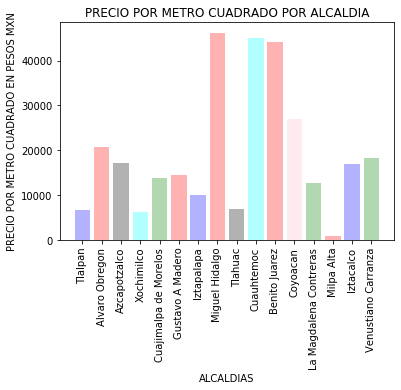

In [47]:

x_axis = np.arange(len(Alcaldias_PrecioxM2_df["ALCALDIA"]))

plt.bar(x_axis, Alcaldias_PrecioxM2_df["PRECIO_POR_METRO_CUADRADO"] , color=['blue', 'red', 'black', 'cyan', 'green', 'red', 'blue', 'r', 'black', 'cyan', 'r', 'pink','green', 'red','blue','g','pink'], alpha=.3, align="center")
plt.title("PRECIO POR METRO CUADRADO POR ALCALDIA")
plt.xlabel("ALCALDIAS")
plt.ylabel("PRECIO POR METRO CUADRADO EN PESOS MXN")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Alcaldias_PrecioxM2_df["ALCALDIA"],rotation=90)

# Save the Figure
plt.savefig("output_data/PrecioM2XAlcadia.png", bbox_inches='tight')

# Show the Figure
plt.show()

In [38]:
vypcolonia_path = "vypcolonia.csv"
violence_colonia_df = pd.read_csv(vypcolonia_path,encoding="latin-1")
violence_colonia_df.head()

,NUM_CASOS,ALCALDIA,COLONIA_HECHOS,DENUNCIAS,POBLACION,indice
0,468,COYOACAN,PEDREGAL DE SANTO DOMINGO,519,93364,5.558888
1,760,IZTACALCO,AGRICOLA ORIENTAL,555,83600,6.638756
2,848,IZTAPALAPA,DESARROLLO URBANO QUETZALCOATL,218,61837,3.525397
3,552,CUAUHTEMOC,CENTRO,1302,61229,21.264434
4,761,IZTACALCO,AGRICOLA PANTITLAN,364,60708,5.995915


In [39]:
precio = []
for index1,row in violence_colonia_df.iterrows():
    for index2,row2 in Alcaldias_PrecioxM2_df.iterrows():
        if row2["ALCALDIA"].lower() == row["ALCALDIA"].lower():
            # print(row2["ALCALDIA"])
            precio.append(row2["PRECIO_POR_METRO_CUADRADO"])
      
violence_colonia_df["PRECIO POR METRO CUADRADO"]  = precio  

violence_colonia_df=violence_colonia_df.rename(columns={"PRECIO POR METRO CUADRADO":"PRECIO_POR_METRO_CUADRADO"})

violence_colonia_df.head(30)


,NUM_CASOS,ALCALDIA,COLONIA_HECHOS,DENUNCIAS,POBLACION,indice,PRECIO_POR_METRO_CUADRADO
0,468,COYOACAN,PEDREGAL DE SANTO DOMINGO,519,93364,5.558888,27000.0
1,760,IZTACALCO,AGRICOLA ORIENTAL,555,83600,6.638756,16949.0
2,848,IZTAPALAPA,DESARROLLO URBANO QUETZALCOATL,218,61837,3.525397,9960.0
3,552,CUAUHTEMOC,CENTRO,1302,61229,21.264434,45037.0
4,761,IZTACALCO,AGRICOLA PANTITLAN,364,60708,5.995915,16949.0
5,976,IZTAPALAPA,SAN MIGUEL TEOTONGO,175,55820,3.135077,9960.0
6,840,IZTAPALAPA,CHINAMPAC DE JUÁREZ,120,53468,2.244333,9960.0
7,358,BENITO JUAREZ,NARVARTE,319,52050,6.128722,44167.0
8,713,GUSTAVO A MADERO,SAN FELIPE DE JESUS,198,49970,3.962377,14545.0
9,1484,VENUSTIANO CARRANZA,JARDIN BALBUENA,233,46624,4.997426,18251.0


In [40]:
violence_colonia_df.to_csv('meter2xcolonyxviolence.csv')

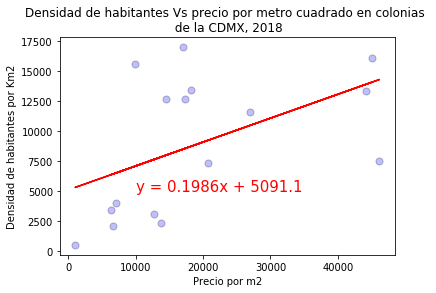

The r-squared is :0.4986924796858637


In [43]:
x_values = Alcaldias_PrecioxM2_df["PRECIO_POR_METRO_CUADRADO"]
y_values = Alcaldias_PrecioxM2_df["DENSIDAD_DE_HABITANTES_(km2)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,5000),fontsize=15,color="red")
plt.title("Densidad de habitantes Vs precio por metro cuadrado en colonias \n de la CDMX, 2018")
plt.xlabel("Precio por m2")
plt.ylabel("Densidad de habitantes por Km2")

# Save the Figure
plt.savefig("output_data/DensidadHabitantesVsPrecioM2.png", bbox_inches='tight')

# Show the Figure
plt.show()

print("The r-squared is :"+str(rvalue))

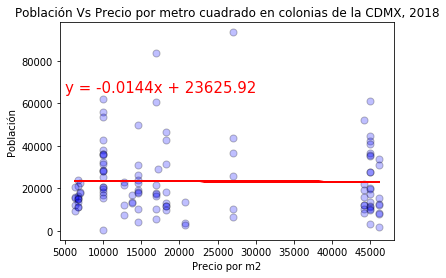

The r-squared is :-0.013620168315553136


In [45]:
x_values = violence_colonia_df["PRECIO_POR_METRO_CUADRADO"]
y_values = violence_colonia_df["POBLACION"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5000,65000),fontsize=15,color="red")
plt.title("Población Vs Precio por metro cuadrado en colonias de la CDMX, 2018")
plt.xlabel("Precio por m2")
plt.ylabel("Población")

# Save the Figure
plt.savefig("output_data/PoblacionVSPrecioM2.png", bbox_inches='tight')

# Show the Figure
plt.show()

print("The r-squared is :"+str(rvalue))

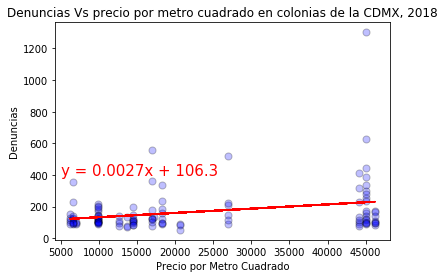

The r-squared is :0.279871943143261


In [46]:
x_values = violence_colonia_df["PRECIO_POR_METRO_CUADRADO"]
y_values = violence_colonia_df["DENUNCIAS"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5000,400),fontsize=15,color="red")
plt.title("Denuncias Vs precio por metro cuadrado en colonias de la CDMX, 2018")
plt.xlabel("Precio por Metro Cuadrado")
plt.ylabel("Denuncias")

# Save the Figure
plt.savefig("output_data/DenunciasVsPrecioM2.png", bbox_inches='tight')

# Show the Figure
plt.show()

print("The r-squared is :"+str(rvalue))